**Como primer puto se enlaza al drive para obtener el dataset y asi poder realizar un cuadernillo **





In [2]:
import numpy as np
import pandas as pd
from google.colab import drive
from matplotlib import pyplot


En esta primera liberia se importan los datos

In [3]:
drive.mount("/content/drive")

Mounted at /content/drive


AquÍ fue lo que hice la importacion de los dataset en el drive

In [4]:
data = pd.read_csv("/content/drive/MyDrive/Dataset Machine learning/housing.csv")
data = np.array(data)
x = data[:,:8]
y = data[:,8]
m_ejemplos = y.size

Se importo la ruta de los dataset.
Donde el array viene a ser lista de datos donde se va a convertir un vector.
donde las variables de  "x" viene a ser los numeros de caracteristicas en un rango donde el numero 8 es el limite y la variable "y" vendria a ser lo ejemplos del dataset.

In [5]:
x.shape

(20640, 8)

x.shape me permite ver el indice de columnas y filas.

In [6]:
def normalizarX(x):
  x_normalizada = []
  promedio = np.mean(x,axis=0)
  x = x.astype(float)
  desviacion_estandar = np.std(x,axis=0)
  for i in range(m_ejemplos):
    caracteristicas_x = []
    for j in range(x.shape[1]):
      if desviacion_estandar[j] != 0:
        caracteristicas_x.append((x[i,j]-promedio[j])/desviacion_estandar[j])
      else:
        caracteristicas_x.append(0)
    x_normalizada.append(caracteristicas_x)
  return x_normalizada, promedio, desviacion_estandar

Al normalizar hace que los valores sean mas pequeños.
donde tambien saca el promedio de las colunmas de "x" para asi no tener valores de 0 o error.

In [7]:
x_normalizada, promedio, desviacion_estandar = normalizarX(x)
x_normalizada = np.array(x_normalizada)
x = np.concatenate((np.ones((m_ejemplos,1)),x_normalizada),axis=1)

A quí se hace las menciones de las caracteristicas para asi poderse guardar.

In [8]:
def calcularCosto(x, y, theta):
  J = 0
  hipotesis = np.dot(x,theta)
  J = (1/(2*m_ejemplos))*np.sum(np.square((hipotesis)-y))
  return J

Con el costo se puede ver cada interaccion que se pueda ajustar a taza de proximidad

In [9]:
def descensoGradiente(x,y,theta,alpha,n_iteraciones):
  historial_J = []
  theta = theta.copy()
  for i in range(n_iteraciones):
    theta = theta-(alpha/m_ejemplos)*(np.dot(x,theta)-y).dot(x)
    historial_J.append(calcularCosto(x,y,theta))
  return theta, historial_J

Con esta formula define la ecuacion para hallar la recta.

In [10]:
def hallarTheta():
  theta = np.zeros(x.shape[1])
  n_iteraciones = 1000
  alpha = 0.003
  theta, historial_J = descensoGradiente(x,y,theta,alpha,n_iteraciones)
  return theta, historial_J

In [11]:
theta, historial_J = hallarTheta()
print("Las thetas encontradas son: ",theta)
print("El menor costo que se pudo determinar fue de: ",historial_J[-1])

Las thetas encontradas son:  [196603.40492298815 -18331.3977901406 -23132.693480589696
 20710.775609709188 6247.244615531131 7592.383765372965
 -14824.629659601786 9784.232873114042 74599.0836649687]
El menor costo que se pudo determinar fue de:  2939798575.73261


Con theta hallamos lo que es x sub 1, x sub 2, x sub 3 etc.
Donde multipica a los valores de una función.
Y donde tambien theta se define al numero de interacciones para ajustar la curva de costo y el coeficiente alpha.

In [12]:
def normalizarXPredecir(x):
  x = np.array(x)
  caracteristicas_x_predecir = []
  for i in range (x.shape[0]):
    if desviacion_estandar[i] != 0:
      caracteristicas_x_predecir.append((x[i]-promedio[i])/desviacion_estandar[i])
    else:
      caracteristicas_x_predecir.append(0)
  return caracteristicas_x_predecir

El predecir es para estimar o prever el valor de una variable objetivo en nuevos datos no vistos. Es decir, se utiliza para hacer predicciones sobre datos futuros o desconocidos.

In [13]:
def predecir(x):
  x = np.array(x)
  x = np.array(x).astype(float)
  x = normalizarXPredecir(x)
  x = np.array(x)
  x = np.concatenate(([1],x),axis=0)
  y_predecir = np.dot(x,theta)
  print("La y predicha para los valores de x es: ",y_predecir)

Text(0, 0.5, 'Costo J')

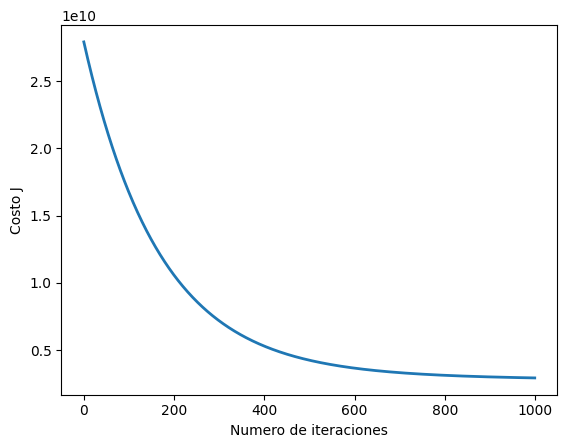

In [14]:
pyplot.plot(np.arange(len(historial_J)), historial_J, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

El numero de interaccion es de 1000 ya que se aproxima a menos de 0,5 donde podemos una recta.

In [15]:
predecir([-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252])
predecir([-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014])
predecir([-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574])
predecir([-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431])
predecir([-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462])
predecir([-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368])
predecir([-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591])
predecir([-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.12])
predecir([-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804])
predecir([-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912])

La y predicha para los valores de x es:  384464.60455591563
La y predicha para los valores de x es:  384784.5792208989
La y predicha para los valores de x es:  362857.497968173
La y predicha para los valores de x es:  300078.66163989884
La y predicha para los valores de x es:  232270.49094360633
La y predicha para los valores de x es:  236824.58523608383
La y predicha para los valores de x es:  230987.2380675034
La y predicha para los valores de x es:  217583.39730722408
La y predicha para los valores de x es:  156456.64439192438
La y predicha para los valores de x es:  238203.29862894517


Predecimos de las 10 filas de datos del dataset.

METODO DE LA NORMAL

In [16]:
data = pd.read_csv("/content/drive/MyDrive/Dataset Machine learning/housing.csv")
data = np.array(data)
x = data[:,:8]
y = data[:,8]
m_ejemplos = y.size
x = np.concatenate((np.ones((m_ejemplos,1)),x),axis=1)

In [17]:
def metodoNormal(x, y):
  x = np.float64(x)
  y = np.float64(y)
  theta = np.dot(np.dot(np.linalg.inv(np.dot(x.T,x)),x.T),y)
  return theta

Con el metodo de la normal se hace un espacio para que puedan entran todos los resultados en decimales.
Donde tambien se ajusta los valores de las características para que estén en una escala común, lo que ayuda a mejorar el rendimiento de los algoritmos al garantizar que todas las características tengan un rango similar.

In [18]:
theta = metodoNormal(x, y)
print("Las thetas encontradas son: ",theta)


Las thetas encontradas son:  [-3.55023864e+06 -4.24444580e+04 -4.24178610e+04  1.13961806e+03
 -5.24593157e+00  5.72557159e+01 -4.08140970e+01  1.00147849e+02
  3.93480354e+04]


In [19]:
x_predecir = [1,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252]
x_predecir = np.array(x_predecir)
y_predecir = np.dot(x_predecir,theta)
print("La y predicha para los valores de x es: ",y_predecir)
x_predecir = [1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014]
x_predecir = np.array(x_predecir)
y_predecir = np.dot(x_predecir,theta)
print("La y predicha para los valores de x es: ",y_predecir)
x_predecir = [1,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574]
x_predecir = np.array(x_predecir)
y_predecir = np.dot(x_predecir,theta)
print("La y predicha para los valores de x es: ",y_predecir)
x_predecir = [1,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431]
x_predecir = np.array(x_predecir)
y_predecir = np.dot(x_predecir,theta)
print("La y predicha para los valores de x es: ",y_predecir)
x_predecir = [1,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462]
x_predecir = np.array(x_predecir)
y_predecir = np.dot(x_predecir,theta)
print("La y predicha para los valores de x es: ",y_predecir)
x_predecir = [1,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368]
x_predecir = np.array(x_predecir)
y_predecir = np.dot(x_predecir,theta)
print("La y predicha para los valores de x es: ",y_predecir)
x_predecir = [1,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591]
x_predecir = np.array(x_predecir)
y_predecir = np.dot(x_predecir,theta)
print("La y predicha para los valores de x es: ",y_predecir)
x_predecir = [1,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.12]
x_predecir = np.array(x_predecir)
y_predecir = np.dot(x_predecir,theta)
print("La y predicha para los valores de x es: ",y_predecir)
x_predecir = [1,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804]
x_predecir = np.array(x_predecir)
y_predecir = np.dot(x_predecir,theta)
print("La y predicha para los valores de x es: ",y_predecir)
x_predecir = [1,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912]
x_predecir = np.array(x_predecir)
y_predecir = np.dot(x_predecir,theta)
print("La y predicha para los valores de x es: ",y_predecir)

La y predicha para los valores de x es:  407509.54988438985
La y predicha para los valores de x es:  424016.1199781181
La y predicha para los valores de x es:  378145.6210621897
La y predicha para los valores de x es:  320315.2397888585
La y predicha para los valores de x es:  254055.66367297748
La y predicha para los valores de x es:  261027.37048884702
La y predicha para los valores de x es:  258268.00790329295
La y predicha para los valores de x es:  256155.55457705626
La y predicha para los valores de x es:  198690.4127125406
La y predicha para los valores de x es:  268070.97884363646


In [36]:
def entrenar_regresion_lineal_con_reg(X_train, y_train, tasa_aprendizaje, lambda_param, num_iteraciones):
    m, n = X_train.shape
    X_train = X_train.astype(np.float64)
    y_train = y_train.astype(np.float64)
    X_train_con_intercepto = agregar_columnasUnos(X_train)  # Agregar intercepto a X_train

    theta = np.zeros(n + 1)  # Inicializar parámetros

    for i in range(num_iteraciones):
        prediccion = predecir(X_train_con_intercepto, theta)
        error = prediccion - y_train
        gradiente = np.dot(X_train_con_intercepto.T, error) / m
        gradiente[1:] += (lambda_param / m) * theta[1:]  # Regularización, excepto para el término de intercepto
        theta -= tasa_aprendizaje * gradiente

    return theta

In [37]:
def agregar_columnasUnos(X):
    m = X.shape[0]
    intercepto = np.ones((m, 1))
    return np.concatenate((intercepto, X), axis=1)

In [38]:
def predecir(X, theta):
    return np.dot(X, theta)

In [39]:
tasa_aprendizaje = 0.01
lambda_param = 0.1
num_iteraciones = 1000
theta_reg= entrenar_regresion_lineal_con_reg(x, y, tasa_aprendizaje, lambda_param, num_iteraciones )

<ipython-input-36-87898354b342>:14: RuntimeWarning: invalid value encountered in subtract
  theta -= tasa_aprendizaje * gradiente


In [40]:
print(theta_reg)

[nan nan nan nan nan nan nan nan nan nan]


Conclusion:
El metodo de la normal identifica mejor los valores de theta que usando el metodo descenso por el gradiente,como se demuestra en este cuadernillo.